In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Library/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
##load the data , it is huge. Do not read again 
destinations = pd.read_csv("destinations.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
print("train dataset shape: ", train.shape)
print("test dataset shape: ", test.shape)
train.head()

('train dataset shape: ', (37670293, 24))
('test dataset shape: ', (2528243, 22))


,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [4]:
test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


<Container object of 100 artists>

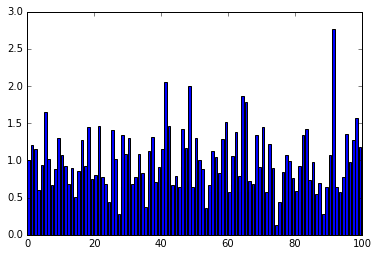

In [19]:
##check the distriubtion of the hotel cluster in the training data
%matplotlib inline 
train_cluster_distribution = train["hotel_cluster"].value_counts()
train_total = np.sum(train_cluster_distribution)
plt.bar(train_cluster_distribution.index, train_cluster_distribution/train_total*100.0 )

In [22]:
###confirm our hypothesis that all the test user ids are found in the train DataFrame.
test_ids = set(test.user_id.unique())
train_ids = set(train.user_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)

##but not all training user id are found the in the test dataset 

True

In [23]:
### convert the date time to year, month 
train["date_time"] = pd.to_datetime(train["date_time"])
train["year"] = train["date_time"].dt.year
train["month"] = train["date_time"].dt.month

In [29]:
##only pick 10000 users 
import random

unique_users = train.user_id.unique()

print("Number of unique users ",unique_users.shape[0])

sel_user_ids = [unique_users[i] for i in sorted(random.sample(range(len(unique_users)), 100000)) ]
sel_train = train[train.user_id.isin(sel_user_ids)]

('Number of unique users ', 1198786)


In [30]:
###Pick new training and testing sets and remove click events 
t1 = sel_train[((sel_train.year == 2013) | ((sel_train.year == 2014) & (sel_train.month < 8)))]
t2 = sel_train[((sel_train.year == 2014) & (sel_train.month >= 8))]
t2 = t2[t2.is_booking == True]
print("new training set number: ", t1.shape[0])
print("new test set number: ", t2.shape[0])

('new training set number: ', 1997933)
('new test set number: ', 82660)


In [5]:
##save the t1, t2 file for the future reuse 
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

pickle_file = 'expedia_small_dataset.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'small_train_dataset': t1,
    'small_test_dataset': t2,
    'destinations': destinations,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [6]:
## direct read the small test set and training set from the pickle file
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

pickle_file = 'expedia_small_dataset.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  t1 = save['small_train_dataset']
  t2 = save['small_test_dataset']
  destinations = save['destinations']
  del save  # hint to help gc free up memory
  print('Small training set', t1.shape)
  print('Small test set', t2.shape)
  print('destinations', destinations.shape)

('Small training set', (1997933, 26))
('Small test set', (82660, 26))
('destinations', (62106, 150))


In [7]:
##PCA analysis on the destinations 
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
dest_small = pca.fit_transform(destinations[["d{0}".format(i + 1) for i in range(149)]])
dest_small = pd.DataFrame(dest_small)
dest_small["srch_destination_id"] = destinations["srch_destination_id"]

In [8]:
##Generate new date features based on date_time, srch_ci, and srch_co.
##Remove non-numeric columns like date_time.
##Add in features from dest_small.
##Replace any missing values with -1.

def calc_fast_features(df):
    df["date_time"] = pd.to_datetime(df["date_time"])
    df["srch_ci"] = pd.to_datetime(df["srch_ci"], format='%Y-%m-%d', errors="coerce")
    df["srch_co"] = pd.to_datetime(df["srch_co"], format='%Y-%m-%d', errors="coerce")
    
    props = {}
    for prop in ["month", "day", "hour", "minute", "dayofweek", "quarter"]:
        props[prop] = getattr(df["date_time"].dt, prop)
    
    carryover = [p for p in df.columns if p not in ["date_time", "srch_ci", "srch_co"]]
    for prop in carryover:
        props[prop] = df[prop]
    
    date_props = ["month", "day", "dayofweek", "quarter"]
    for prop in date_props:
        props["ci_{0}".format(prop)] = getattr(df["srch_ci"].dt, prop)
        props["co_{0}".format(prop)] = getattr(df["srch_co"].dt, prop)
    props["stay_span"] = (df["srch_co"] - df["srch_ci"]).astype('timedelta64[h]')
        
    ret = pd.DataFrame(props)
    
    ret = ret.join(dest_small, on="srch_destination_id", how='left', rsuffix="dest")
    ret = ret.drop("srch_destination_iddest", axis=1)
    return ret

df = calc_fast_features(t1)
df.fillna(-1, inplace=True)


In [9]:
df.head()

,channel,ci_day,ci_dayofweek,ci_month,ci_quarter,cnt,co_day,co_dayofweek,co_month,co_quarter,...,srch_rm_cnt,stay_span,user_id,user_location_city,user_location_country,user_location_region,year,0,1,2
2248,2,1.0,4.0,8.0,3.0,1,6.0,2.0,8.0,3.0,...,1,120.0,9701,53434,69,756,2014,-0.44879,0.263463,-0.051078
2249,2,1.0,4.0,8.0,3.0,1,4.0,0.0,8.0,3.0,...,1,72.0,9701,53434,69,756,2014,-0.44879,0.263463,-0.051078
2250,2,1.0,4.0,8.0,3.0,1,4.0,0.0,8.0,3.0,...,1,72.0,9701,53434,69,756,2014,-0.44879,0.263463,-0.051078
2430,0,18.0,6.0,8.0,3.0,1,23.0,4.0,8.0,3.0,...,1,120.0,11176,49887,68,335,2013,-0.44879,0.263463,-0.051078
2431,0,19.0,0.0,8.0,3.0,1,23.0,4.0,8.0,3.0,...,1,96.0,11176,49887,68,335,2013,-0.44879,0.263463,-0.051078


In [17]:
##since machine learning way doesn't work, try another techiques 
def make_key(items):
    return "_".join([str(i) for i in items])

match_cols = ["srch_destination_id"]
cluster_cols = match_cols + ['hotel_cluster']
groups = t1.groupby(cluster_cols)
top_clusters = {}
for name, group in groups:
    clicks = len(group.is_booking[group.is_booking == False])
    bookings = len(group.is_booking[group.is_booking == True])
    
    score = bookings + .15 * clicks
    
    clus_name = make_key(name[:len(match_cols)])
    if clus_name not in top_clusters:
        top_clusters[clus_name] = {}
    top_clusters[clus_name][name[-1]] = score

In [19]:
import operator

cluster_dict = {}
for n in top_clusters:
    tc = top_clusters[n]
    top = [l[0] for l in sorted(tc.items(), key=operator.itemgetter(1), reverse=True)[:5]]
    cluster_dict[n] = top

preds = []
for index, row in t2.iterrows():
    key = make_key([row[m] for m in match_cols])
    if key in cluster_dict:
        preds.append(cluster_dict[key])
    else:
        preds.append([])

In [21]:
###access the MAPK score
import ml_metrics as metrics
metrics.mapk([[l] for l in t2["hotel_cluster"]], preds, k=5)

0.28956165819824181

In [24]:
match_cols = ['user_location_country', 'user_location_region', 'user_location_city', 'hotel_market', 'orig_destination_distance']

groups = t1.groupby(match_cols)
    
def generate_exact_matches(row, match_cols):
    index = tuple([row[t] for t in match_cols])
    try:
        group = groups.get_group(index)
    except Exception:
        return []
    clus = list(set(group.hotel_cluster))
    return clus

exact_matches = []
for i in range(t2.shape[0]):
    exact_matches.append(generate_exact_matches(t2.iloc[i], match_cols))

In [28]:
most_common_clusters = list(t1.hotel_cluster.value_counts().head().index)

def f5(seq, idfun=None): 
    if idfun is None:
        def idfun(x): return x
    seen = {}
    result = []
    for item in seq:
        marker = idfun(item)
        if marker in seen: continue
        seen[marker] = 1
        result.append(item)
    return result
    
full_preds = [f5(exact_matches[p] + preds[p] + most_common_clusters)[:5] for p in range(len(preds))]
metrics.mapk([[l] for l in t2["hotel_cluster"]], full_preds, k=5)

0.37275586740866201

In [ ]:
###submit file
write_p = [" ".join([str(l) for l in p]) for p in full_preds]
write_frame = ["{0},{1}".format(t2["id"][i], write_p[i]) for i in range(len(full_preds))]
write_frame = ["id,hotel_clusters"] + write_frame
with open("predictions.csv", "w+") as f:
    f.write("\n".join(write_frame))
    

In [33]:
t1.groupby(['user_location_country', 'user_location_city', 'orig_destination_distance','hotel_cluster']).agg('count')

date_time  \
user_location_country user_location_city orig_destination_distance hotel_cluster              
0                     56136              0.3494                    60                     1   
                                         0.8823                    57                     1   
                                         0.8895                    61                     1   
                                         0.9770                    78                     1   
                                         1.0963                    46                     5   
                                         1.3258                    57                     1   
                                         1.3870                    46                     2   
                                         1.3882                    75                     1   
                                         1.4115                    46                     1   
                                         1.6732                    20                     2   
                                         1.7118                    75                     3   
                                         1.8606                    82                     6   
                                         1.9610                    61                     1   
                                         2.0914                    30                     1   
                                         2.1220                    60                     1   
                                         2.3438                    62                     1   
                                         2.5213                    38                     2   
                                         2.5286                    81                     5   
                                                                   82                     4   
                                         2.5611                    61                     3   
                                         2.5705                    60                     1   
                                         2.6308                    43                     1   
                                                                   81                     4   
                                         2.6619                    81                     1   
                                         3.1309                    46                     1   
                                         3.2209                    46                     1   
                                         3.4009                    46                     2   
                                         3.4794                    85                     2   
                                         3.6234                    61                     1   
                                         3.8256                    61                     1   
...                                                                                     ...   
215                   51733              10415.1474                67                     1   
                      53073              6424.4215                 46                     1   
                                         6424.6284                 85                     1   
                                         6425.2079                 46                     1   
                      53855              60.3341                   94                     2   
                                         63.0654                   40                     1   
                                         243.7876                  28                     2   
                                         243.9662                  91                     1   
                                         442.4074                  32                     1   
                                         442.5923                  28                     1 